### 서울시에서 가장 더웠던 날의 일자와 온도 확인하기


1. csv 모듈을 이용
- [모두의 데이터 분석] 51페이지 참조
- 데이터: seoul_weather.csv
- 폴더위치: content/data/
- 맨 윗줄은 header 변수에 저장
- 최고 기온/날짜 저장 변수 초기화
- 누락된 온도를 찾아 -999로 저장
- 문자열로 저장된 온도를 실수형 자료로 변경
- 최고 높은 온도와 해당 날짜 찾기 및 출력
  * for / if 구문 사용


csv 모듈로 데이터 읽어오기

In [3]:
import csv # 모듈 연결  
import time

In [6]:
# 파일연결 
strt = time.time()

f = open("seoul_weather.csv", encoding = "cp949")
data = csv.reader(f)
header = next(data)
print(header, "\n")

# "최고기온" 중 가장 높은 온도값/해당 온도의 "일시"를 출력
# 일자별 최고 온도 찾기 = > 이 온도의 날짜 가져오기

max_temp = -999   # 최고 온도를 계산하기 위한 변수(최초 -999 부여)
max_date = ""     # 최고 온도를 찾았을 때 날짜를 저장할 변수

for row in data:
  # row 값 => ['서울', '1907-10-01', '13.5', '7.9', '20.7']
    try:
        row[-1] = float(row[-1])  # row의 마지막 데이터(최고기온)의 dtype => 실수형으로 변경
        if max_temp < row[-1]:    # 현재 최고온도가 기본 최고온도보다 높다면 기본온도 변경
            max_temp = row[-1]
            max_date = row[1]
    except:
        continue
    # row[-1] = -999
    # print(row[-1])
    
    
f.close()

print(f"기상관측을 시작한 이래 서울의 최고 기온은 {max_temp}이고, 날짜는 {max_date}입니다")
endt = time.time()
print(endt - strt)

['지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'] 

기상관측을 시작한 이래 서울의 최고 기온은 39.6이고, 날짜는 2018-08-01입니다
0.05020499229431152


In [10]:
## NaN을 if를 이용해 처리

# 파일연결

strt = time.time()
f = open("seoul_weather.csv", encoding="cp949")
data = csv.reader(f)
header=next(data)
print(header, "\n")

# "최고기온" 중 가장 높은 온도값/해당 온도의 "일시"를 출력
# 일자별 최고 온도 찾기 = > 이 온도의 날짜 가져오기

max_temp=-999     # 최고 온도를 계산하기 위한 변수(최초 -999 부여)
max_date=""       # 최고 온도를 찾았을때 날짜를 저장할 변수

for row in data:
    # row 값 => ['서울', '1907-10-01', '13.5', '7.9', '20.7']
    # NaN 값 처리
    if row[-1] == "":
        row[-1] = -999

    # row의 마지막 데이터(최고기온)의 dtype => 실수형으로 변경
    row[-1] = float(row[-1])   

    # 현재 최고온도가 기본 최고온도보다 높다면 기본온도 변경
    if max_temp < row[-1]:     
        max_temp = row[-1]
        max_date = row[1]

f.close()

print(f"기상관측을 시작한 이래 서울의 최고 기온은 {max_temp}이고, 날짜는 {max_date} 입니다.")

endt = time.time()
print(endt - strt)

['지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'] 

기상관측을 시작한 이래 서울의 최고 기온은 39.6이고, 날짜는 2018-08-01 입니다.
0.05215311050415039


In [12]:
f = open("seoul_weather.csv", encoding="cp949")
data = csv.reader(f)
list(data)[:5]

[['지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'],
 ['서울', '1907-10-01', '13.5', '7.9', '20.7'],
 ['서울', '1907-10-02', '16.2', '7.9', '22'],
 ['서울', '1907-10-03', '16.2', '13.1', '21.3'],
 ['서울', '1907-10-04', '16.5', '11.2', '22']]

2. pandas 모듈 이용하기
- 결측지 처리하기

In [13]:
# 모듈 연결 및 파일 읽기
import pandas as pd

df = pd.read_csv("seoul_weather.csv", encoding = "cp949")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41382 entries, 0 to 41381
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점명      41382 non-null  object 
 1   일시       41382 non-null  object 
 2   평균기온(℃)  40626 non-null  float64
 3   최저기온(℃)  40625 non-null  float64
 4   최고기온(℃)  40624 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.6+ MB


In [14]:
# 결측지(NaN) 처리 => 한행에 3개이상 존재하면 해당 행 삭제
print(df.isna().sum())    # 각 필드(열)별 NaN 갯수 확인

df = df.dropna(thresh = 3)
print(df.isna().sum())    # 삭제후

지점명          0
일시           0
평균기온(℃)    756
최저기온(℃)    757
최고기온(℃)    758
dtype: int64
지점명        0
일시         0
평균기온(℃)    0
최저기온(℃)    1
최고기온(℃)    2
dtype: int64


# 중요!!!!

In [16]:
# NaN이 2개 이하인 데이터는 아래와 같이 바로 앞 또는 뒤 행의 값으로 채우기

# 결측값의 앞 행의 값으로 채우기 : df.fillna(method='ffill') *
# 결측값의 뒷 행의 값으로 채우기 : df.fillna(method='bfill')
# 각 열의 평균 값으로 채우기 : df.fillna(df.mean())

df.fillna(method= 'ffill')
print(df.isna().sum())    # 데이터 수정후

지점명        0
일시         0
평균기온(℃)    0
최저기온(℃)    1
최고기온(℃)    2
dtype: int64


In [17]:
df1 = df[df['최고기온(℃)'] == df['최고기온(℃)'].max()][["일시", "최고기온(℃)"]]
print(f"기상관측을 시작한 이래 서울의 최고 기온은 {df1.iloc[0,0]}이고, 날짜는 {df1.iloc[0, 1]} 입니다.")
# 결측지(NaN) 처리 => 한행에 3개이상 존재하면 해당 행 삭제


기상관측을 시작한 이래 서울의 최고 기온은 2018-08-01이고, 날짜는 39.6 입니다.


In [18]:
strt = time.time()

df = pd.read_csv("seoul_weather.csv", encoding="cp949")
df.info()

# 결측지(NaN) 처리 => 한행에 3개이상 존재하면 해당 행 삭제
print(df.isna().sum())   # 각 필드(열)별 NaN 갯수 확인(삭제전)

df=df.dropna(thresh=3)
#print(df.isna().sum())   # 삭제후
df=df.fillna(method='ffill')
#print(df.isna().sum())  
df1=df[df['최고기온(℃)'] == df['최고기온(℃)'].max()][["일시", "최고기온(℃)"]]
print(f"기상관측을 시작한 이래 서울의 최고 기온은 {df1.iloc[0, 0]}이고, 날짜는 {df1.iloc[0, 1]} 입니다.")

endt = time.time()

print(endt-strt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41382 entries, 0 to 41381
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점명      41382 non-null  object 
 1   일시       41382 non-null  object 
 2   평균기온(℃)  40626 non-null  float64
 3   최저기온(℃)  40625 non-null  float64
 4   최고기온(℃)  40624 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.6+ MB
지점명          0
일시           0
평균기온(℃)    756
최저기온(℃)    757
최고기온(℃)    758
dtype: int64
기상관측을 시작한 이래 서울의 최고 기온은 2018-08-01이고, 날짜는 39.6 입니다.
0.08870410919189453


# 내 생일의 기온변화 그래프 그리기

- 날씨 데이터 읽어오기

> 들여쓴 블록


- 헤더 부분(제목)을 next() 함수를 사용해 제외
- 내 생일의 최고기온/최저기온 저장 변수 생성

In [20]:
# csv 파일 읽어오기



- 년도별 생일날의 최고기온/최저기온 추출하기
- 추출한 데이터 리스트 변수에 저장하기

1. 최고/최저/년도별생일 저장 리스트 변수
2. data에서 태어난 년도 이후의 생일의 기온 가져오기
- 데이터들 중 NaN 값에 대한 처리 방법 고민!!!!
- 데이터 형식 => 모두 텍스트 => int/float 수정
- 년도만 가져와 int변경 후 이 값이 태어난 년도보다 크면서, 월과 일이 생일과 일치하는지 확인
 => 일치하면 데이터 추가(년도, 최저기온, 최고기온)
- 년도만 가져오려면 ?/ 월만 가져오려면, /일만 가져오려면?
3. 시각화
- matplotlib을 이용한 차트 작성
- 하나의 차트에 최저/최고 같이 출력

In [21]:
int('1907-10-01'.split("-")[0]) >= 2000  # 년도 체크
'1907-10-01'.split("-")[1] == "10" and '1907-10-01'.split("-")[-1] == "01" # 월 체크


True

In [22]:
# 모든 생일날의 최고/최저 온도와 날짜 받아오기
import csv
f = open("seoul_weather.csv", encoding = "cp949")

data =csv.reader(f)
next(data)

max_temp = -999
min_temp = 999
max_date = ""
min_date = ""
for row in data:
    # NaN 값 처리
    if row[-1] == "":
        row[-1] = -999
  
    # row의 마지막 데이터(최고기온)의 dtype => 실수형으로 변경
    row[-1] = float(row[-1])   

    if row[-2] == "":
        row[-2] = 999

    # row의 -2번째 데이터(최저기온)의 dtype => 실수형으로 변경
    row[-2] = float(row[-2])

    # 현재 최고온도가 기본 최고온도보다 높다면 기본온도 변경
    if max_temp < row[-1]:     
        max_temp = row[-1]
        max_date = row[1]

    # 현재 최저온도가 기본 최저온도보다 낮다면 기본온도 변경
    if min_temp > row[-2]:
        min_temp = row[-2]
        min_date = row[1]
    
    
print(f"기상관측을 시작한 이래 서울의 최고 기온은 {max_temp}이고, 날짜는 {max_date} 입니다.")
print(f"기상관측을 시작한 이래 서울의 최저 기온은 {min_temp}이고, 날짜는 {min_date} 입니다.")

기상관측을 시작한 이래 서울의 최고 기온은 39.6이고, 날짜는 2018-08-01 입니다.
기상관측을 시작한 이래 서울의 최저 기온은 -23.1이고, 날짜는 1927-12-31 입니다.


In [23]:
# 모든 생일날의 최고/최저 온도와 날짜 받아오기
import csv

f = open("seoul_weather.csv", encoding = "cp949")
data = csv.reader(f)
next(data)

max_temp=[];min_temp=[];date_tmp=[]

for row in data:    # csv.reader에서 1개씩 읽어오기
    # NaN 확인(최고/최저 기온 모두 값이 있다면/NaN이 아니라면)
    if row[-2] != "" and row[-1] != "":
        if int(row[1].split("-")[0]) >= 1995:
            if row[1][5:7] == "04" and row[1][-2:] == "13":
                max_temp.append(float(row[-1]))     # 최고기온 리스트 추가
                min_temp.append(float(row[-2]))     # 최고기온 리스트 추가
                date_tmp.append(row[1][:4])        # row[1].split("-")[0]

print(max_temp)
    


[18.1, 14.1, 21.3, 20.7, 9.3, 18.7, 16.3, 16.0, 17.8, 22.7, 15.8, 12.0, 14.3, 16.8, 20.6, 9.6, 17.4, 15.1, 17.5, 24.3, 17.6, 21.4, 19.6, 19.3, 17.9, 20.4, 13.5]


- 그래프 그리기

* 최고/최저 온도를 출력하는 차트 그리기



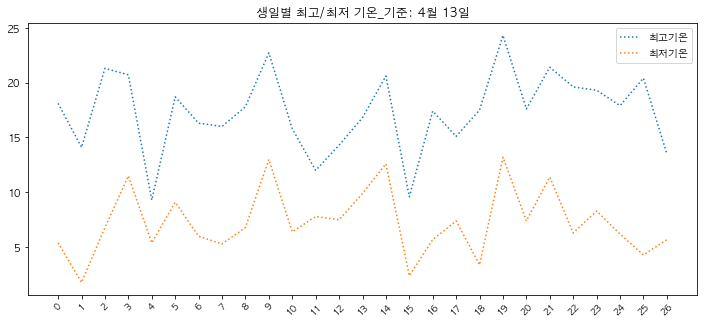

In [31]:
# 차트에서 한글 사용
import matplotlib.pyplot as plt
import platform

if platform.system() == "Darwin":  # 맥
    plt.rc('font', family='AppleGothic')
elif platform.system() == "Windows":  # 윈도우
    plt.rc('font', family='Malgun Gothic')
elif platform.system() == "Linux":  # 리눅스 = 코랩
    plt.rc('font', family='Malgun Gothic')


plt.figure( figsize = (12, 5))
plt.plot(max_temp, ":" ,label="최고기온")
plt.plot(min_temp, ":", label="최저기온")

plt.title("생일별 최고/최저 기온_기준: 4월 13일")
plt.legend()
plt.xticks(list(range(len(date_tmp))), label=date_tmp, rotation = 45, size = 9)

plt.show()


In [28]:
### 유가정보

df2 = pd.read_csv("서울시유류정보.csv", encoding="cp949")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      225 non-null    object 
 1   상표      225 non-null    object 
 2   구       225 non-null    object 
 3   셀프여부    225 non-null    object 
 4   휘발유     225 non-null    float64
 5   경유      225 non-null    float64
dtypes: float64(2), object(4)
memory usage: 10.7+ KB


In [29]:
df3=df2.groupby("구").mean()
display(df3)

,휘발유,경유
구,,
강남구,2147.099888,2038.561369
강동구,2075.842660,1960.161206
강북구,2001.230769,1912.153846
노원구,2035.933333,1938.666667
도봉구,2020.994368,1934.792049
마포구,2071.750000,1972.833333
서초구,2068.696970,1977.393939
송파구,2013.687500,1911.093750
양천구,2001.760000,1929.840000


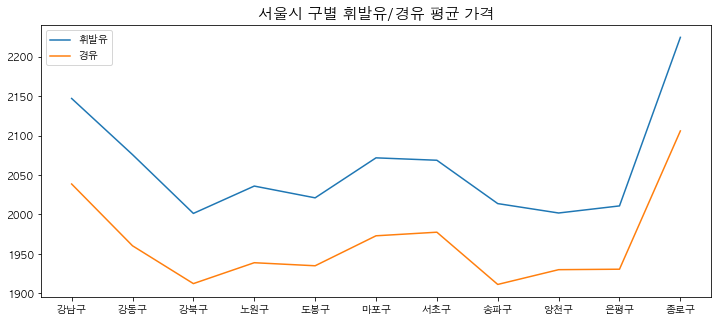

In [32]:
import matplotlib.pyplot as plt

plt.figure( figsize = (12, 5))
plt.plot(df3['휘발유'], label="휘발유")
plt.plot(df3['경유'], label="경유")

plt.title("서울시 구별 휘발유/경유 평균 가격", size = 15)
plt.legend()

plt.show()

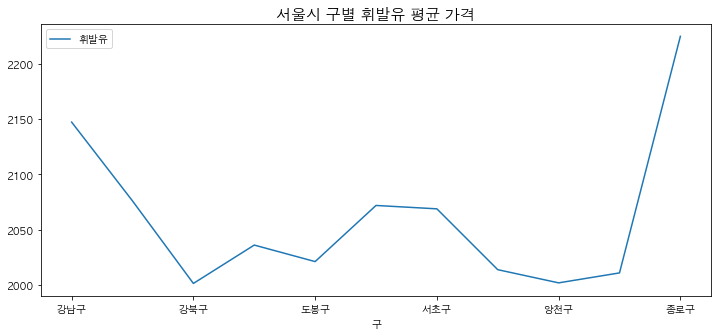

In [33]:


plt.figure( figsize = (12, 5))
df3["휘발유"].plot()

plt.title("서울시 구별 휘발유 평균 가격", size = 15)
plt.legend()

plt.show()